In [1]:
from pathlib import Path
import time

import numpy as np<
import SimpleITK as sitk
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt

from src.models.fetch_data_2d_fixed import (get_tf_dataset, tf_parse_image,
                                            parse_image, slice_image)
from src.data.make_dataset import parse_image as p_image

In [2]:
path_data_nii = Path("/home/val/python_wkspce/plc_seg/data/interim/nii_raw")
path_mask_lung_nii = Path(
    "/home/val/python_wkspce/plc_seg/data/interim/lung_contours")

patient_list = [
    f.name.split("__")[0] for f in path_mask_lung_nii.rglob("*LUNG*")
]

patient_list = patient_list[:1]
patient_ds = tf.data.Dataset.from_tensor_slices(patient_list)

In [3]:
for p in patient_list:
    image, mask = p_image(p, path_data_nii, path_mask_lung_nii)

In [4]:
image.shape

(512, 512, 30, 3)

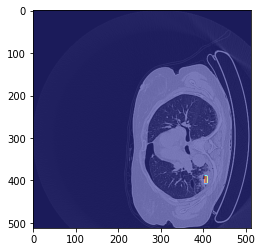

In [5]:
s=0
plt.imshow(image[:,:, s, 0],cmap='gray')
plt.imshow(mask[:,:,s, 0], cmap='jet', alpha=0.5)

In [3]:
patient_list

['PatientLC_22']

In [4]:
sitk_volume_ds = patient_ds.map(lambda patient_name: (*tf_parse_image(
    patient_name,
    Path(path_data_nii),
    Path(path_mask_lung_nii),
),)).as_numpy_iterator()


In [5]:
f = lambda inp: slice_image(inp,
                augment_angles=(0, 0, 0),
                output_shape=(256, 256),
                spacing=(1, 1, 1),
                random_center=False,
                interp_order_image=3,
                interp_order_mask=0,
                fill_mode='constant',
                fill_value=0.0)


In [6]:
for p in sitk_volume_ds:
    image, mask = f(p)


In [7]:
len(p)

9

In [8]:
image.shape

(256, 256, 3)

In [9]:

c=0 # 0:ct, 1:pt
c_m=3 # 0: gtv t, 1:gtv l, 2: lung1, 3: lung2


plt.imshow(image[:,:, c],cmap='gray')
plt.imshow(mask[:,:,c_m], cmap='jet', alpha=0.5)

IndexError: index 3 is out of bounds for axis 2 with size 3

In [5]:
    data_test = get_tf_dataset(
        patient_list,
        path_data_nii,
        path_mask_lung_nii,
        output_shape=(256,256),
    )

In [6]:
yo = next(data_test.as_numpy_iterator())

c0est ca le dtype <dtype: 'float32'>


In [7]:
yo[0].shape

(256, 256, 3)